# Foundations of Computational Economics #34

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Numerical integration, quadrature

<img src="_static/img/lecture.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/cc14S679x2M](https://youtu.be/cc14S679x2M)

Description: Gaussian quadrature. Monte Carlo integration.

### Integration in economics

- Expected (discounted) utility  
- Expected (discounted) profits  
- Bayesian posterior  
- Likelihood function with unobservables  
- Stochastic elements in (dynamic) economic models  


*Most integrals can not be evaluated analytically*

### Two main approaches: Monte Carlo and quadrature

1. Based on simulations – **Monte Carlo integration**  
1. Based on the fixed points and weights – **quadrature integration**  

### Newton-Cotes formulas

Goal: definite integral $ \int_a^b f(x) dx $

Idea: Approximate the function with low order polynomial, then integrate
approximation

1. First order >> Step function approximation  
  - Constant, level at midpoint of $ [a,b] $  
1. Second order >> Linear approximation  
  - Trapezoid rule  
1. Third order >> Quadratic approximation  
  - Simpson rule  

<img src="_static/img/composite_simpsons.png" style="width:800px;">

### Composite Newton-Cotes

Preform Newton-Cotes on a grid separately on each interval

- Equally spaced points  
- Newton-Cotes on each sub-interval  


*Note that the points are placed exogenously*

<img src="_static/img/newton-cotes.jpg" style="width:800px;">

### Gaussian quadrature

General formula

$$
\int_a^b f(x) dx = \sum_{i=1}^n \omega_i f(x_i)
$$

- $ x_i \in [a,b] $ quadrature nodes  
- $ \omega_i $ quadrature weights  


*Note that the points are placed endogenously*

### Quadrature accuracy

Suppose that $ \{\phi_k(x)\}_{k=1,2,\dots} $ is family of
polynomials of degree $ k $ *orthogonal* with respect to the
weighting function $ w(x) $

- let $ q_k $ denote the leading coefficients so that $ \phi_k(x)=q_k x^k + \dots $  
- let $ x_i $, $ i=1,\dots,n $ be $ n $ roots of $ \phi_n(x) $  
- let $ \omega_i = - \frac{q_{n+1}/q_n}{\phi'_n(x_i)\phi_{n+1}(x_i)}>0 $  


Then

- $ a<x_1<x_2<\dots<x_n<b $  
- for $ f(x) \in C^{(2n)}[a,b] $, for some $ \xi\in[a,b] $  


$$
\int_a^b w(x) f(x) dx = \sum_{i=1}^n \omega_i f(x_i) + \frac{f^{(2n)}(\xi)}{q_n^2(2n)!}
$$

- the right hand side is unique on $ n $ nodes  
- exact integral for all polynomial $ f(x) $ of degree $ 2n-1 $  

### Gauss-Chebyshev Quadrature

- Domain $ [-1,1] $  
- Weighting function $ (1-x^2)^{(-1/2)} $  


$$
\int_{-1}^1 \frac{f(x)dx}{\sqrt{1-x^2}} = \frac{\pi}{n}\sum_{i=1}^{n} f(x_i) + \frac{\pi}{2^{2n-1}}\frac{f^{(2n)}(\xi)}{(2n)!}
$$

- quadrature nodes $ x_i = \cos(\frac{2i-1}{2n}\pi) $  

### Example

Want to integrate $ f(x) $ on $ [a,b] $, no weighting function.
1. Change of variable $ y=2(x-a)/(b-a)-1 $
2. Multiply and divide by weighting function

$$
\int_a^b f(x)dx = \frac{b-a}{2}\int_{-1}^{1}f\big(\frac{(y+1)(b-a)}{2}+a\big)\frac{\sqrt{1-y^2}}{\sqrt{1-y^2}}dy
$$

$$
\int_a^b f(x)dx = \frac{\pi(b-a)}{2n}\sum_{i=1}^{n}f\big(\frac{(y_i+1)(b-a)}{2}+a\big)\sqrt{1-y_i^2}
$$

where $ y_i $ are Gauss-Chebyshev nodes over $ [-1,1] $

### Gauss-Legendre Quadrature

- Domain $ [-1,1] $  
- Weighting function $ 1 $  


$$
\int_{-1}^1 f(x)dx = \sum_{i=1}^{n} \omega_i f(x_i) + \frac{2^{2n+1}(n!)^4}{(2n+1)!(2n)!} \frac{f^{(2n)}(\xi)}{(2n)!}
$$

- Nodes and weights come from Legendre polynomials, values tabulated  

### Gauss-Hermite Quadrature

- Domain $ [-\infty,\infty] $  
- Weighting function $ \exp(-x^2) $  


$$
\int_{-\infty}^\infty f(x) \exp(-x^2)dx = \sum_{i=1}^{n} \omega_i f(x_i) + \frac{n!\sqrt{\pi}}{2^n}\frac{f^{(2n)}(\xi)}{(2n)!}
$$

- Nodes and weights come from Hermite polynomials, values tabulated  
- Good for computing expectation with Normal distribution  

### Gauss-Laguerre Quadrature

- Domain $ [0,\infty] $  
- Weighting function $ \exp(-x) $  


$$
\int_{0}^\infty f(x) \exp(-x)dx = \sum_{i=1}^{n} \omega_i f(x_i) + (n!)^2\frac{f^{(2n)}(\xi)}{(2n)!}
$$

- Nodes and weights come from Laguerre polynomials, values tabulated  
- Good for computing expectation exponential discounting  

#### Multidimensional quadrature

Much more complication, simple methods are subject to curse of
dimensionality

- Generic product rule  


$$
\int_{[a,b]^d}f(x)dx=\sum_{i_1=1}^n \dots\sum_{i_d=1}^n \omega_{i_1}^1\dots\omega_{i_1}^d f(x_{i_1}^1,\dots,x^d_{i_d})
$$

- Product Gaussian quadrature based on product orthogonal polynomials  
- Sparse methods  
- Monte Carlo integration!  

## Monte Carlo integration

- Stochastic algorithm for computing integrals  
- Main idea: approximate the expectation of a function with an average computed from a sample of random draws  
- (convergence in the number of draws is due to the law of large numbers)  
- Then convert the integral in expectation to the integral of interest  

### Expectation of a function of random variable

- let continuous random variable $ \tilde{X} $ be distributed with pdf $ p(x) $ over domain $ \Omega $  
- we are interested in the expectation of the function $ f(\tilde{X}) $ which is in turn a random variable itself  


$$
E\big(f(\tilde{X})\big) = \int_{\Omega} f(x) \,dF(x) = \int_{\Omega} f(x) p(x) \,dx
$$

- variance of $ f(\tilde{X}) $ is  


$$
\operatorname{Var} \big(f(\tilde{X})\big) = E\Big(f(\tilde{X})- E\big(f(\tilde{X})\big)\Big)^2 = E\big(f(\tilde{X})\big)^2 - \Big(E\big(f(\tilde{X})\big)\Big)^2
$$

### From expectation to integration

- imagine we want to compute the integral denoted $ I_f $ of function $ f(x) $ over some set $ \Omega $  


$$
I_f =\int_{\Omega} f(x)\,dx
$$

- Step 1: represent the integral as an expectation of a function of some random variable $ \tilde{X} $ defined over domain $ \Omega $  


$$
I_f =\int_{\Omega} f(x)\,dx =
\int_{\Omega} \frac{f(x)}{p(x)} p(x) \,dx =E \left[ \frac{f(\tilde{X})}{p(\tilde{X})} \right]
$$

### From expectation to integration

- Step 2: compute the expectation using $ N $ independent draws $ x_i $ of $ \tilde{X} $ — from the distribution with pdf $ p(x) $  


$$
I_f =\int_{\Omega} f(x)\,dx = E \left[ \frac{f(\tilde{X})}{p(\tilde{X})} \right] \approx \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{p(x_i)}
\underset{N \rightarrow \infty}{\rightarrow} E \left[ \frac{f(\tilde{X})}{p(\tilde{X})} \right]
$$

- convergence due to the law of large numbers  

### Special simple case (naive Monte Carlo integration)

- not to have to deal with pdf $ p(x) $ we can use **uniform distribution**  
- then pdf $ p(x) $ is independent of $ x $ and can be treated as a constant  


$$
p(x) = \left( \int_{\Omega} dx \right) ^{-1} = \frac{1}{V}
$$

- $ V $ is a measure of the set $ \Omega $: length in one dimension, volume in two dimensions, etc.  


$$
I_f =\int_{\Omega} f(x)\,dx = E \left[ Vf(\tilde{X}) \right] \approx \frac{V}{N} \sum_{i=1}^{N} f(x_i)
$$

### Special even simpler case with unit hypercube

- let $ \Omega \subset \mathbb{R}^n $ be a unit hypercube denoted $ H_n $ in $ n $-dimensional space  
- then $ V = 1 $  
- integral is the same as simple average of the function computed on a random set of points uniformly distributed over the hypercube  


$$
I_f =\int_{H_n} f(x)\,dx  \approx \frac{1}{N} \sum_{i=1}^{N} f(x_i)
$$

### One dimensional example

- let $ \Omega $ be an interval $ [a,b] \subset \mathbb{R} $ in one dimensional space  
- then $ V = b-a $  


$$
I_f =\int_{a}^{b} f(x)\,dx  \approx \frac{b-a}{N} \sum_{i=1}^{N} f(x_i)
$$

### One dimensional example visual

<img src="_static/img/MCIntegration.png" style="width:1000px;">

### General Monte Carlo integration algorithm

1. sample $ N $ points $ x_1,\cdots,x_N $ from distribution $ p(x) $ of $ \tilde{X} $ on $ \Omega $  
1. approximate the expectation $ E \left[ \frac{f(\tilde{X})}{p(\tilde{X})} \right] $ by the sample average  


$$
I_f = \int_{\Omega} f(x)\,dx \approx \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{p(x_i)} = Q_f(N)
$$

### General Monte Carlo integration algorithm (simple naive approach)

1. sample $ N $ points $ x_1,\cdots,x_N $ uniformly on $ \Omega $  
1. approximate the expectation $ E \left[ V f(\tilde{X})\right] $ by the sample average  


$$
I_f = \int_{\Omega} f(x)\,dx \approx \frac{V}{N} \sum_{i=1}^{N} f(x_i), \; V =\int_{\Omega} \,dx
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

def mc_int_cube(f,ndims=1,N=1000):
    '''Computes the integral of function f on a hypercube of dimension ndims
       using Monte Carlo integration with N uniformly distributed points
       Assume function f uses axis=0 for inputs, and can be vectorized in other axis
       Return: value and standard error
    '''
    # generate uniform numbers on the hypercube
    x = np.random.random(ndims*N).reshape(ndims,N)  # uniform random numbers in a matrix
    y = f(x)                   # function value
    Q = y.mean()               # sample average
    seQ = y.std()/np.sqrt(N)   # standard error of sample average
    return Q,seQ

In [2]:
# pi example from video 33 as two-dim integral
# Approximate pi using 2-d Monte Carlo integration

N=1000 # Number of Monte carlo Samples
g = lambda x: (x[0,:]**2 + x[1,:]**2)<1  # indicator function to inegrate

q,se = mc_int_cube(g,ndims=2,N=N)
pi_hat = 4*q
se_pi_hat = 4*se

print('Number of Monte Carlo samples   : ', N);
print('Estimate (pi_hat)               : ', pi_hat.round(10));
print('Standard error (pi_hat)         : ', se_pi_hat.round(10));
print('Approximation error (pi_hat-pi) : ', (pi_hat-np.pi).round(10))

Number of Monte Carlo samples   :  1000
Estimate (pi_hat)               :  3.208
Standard error (pi_hat)         :  0.050405714
Approximation error (pi_hat-pi) :  0.0664073464


### Properties of Monte Carlo integral

**Consistency**: Law of large numbers ensures that the sample average converge to the mean

$$
\lim _{{N\to \infty }}Q_f(N)
=\lim _{{N\to \infty }}{\frac{1}{N}}\sum _{{i=1}}^{N}\frac{f(x_i)}{p(x_i)}
=E\left[\frac{f(\tilde{x})}{p(\tilde{x})}\right] = \int_{\Omega} f(x)\,dx = I_f
$$

**Assymptotic Normality**: By the central limit theorem we have

$$
\sqrt{N}\left(Q_f(N)-I_f \right)\ \xrightarrow {d} \ N\left(0,\sigma ^{2}\right), \; \sigma^2= \operatorname{Var}\left[\frac{f(\tilde{x})}{p(\tilde{x})}\right]
$$

The standard error of $ Q_f(N) $ is then given by $ \sigma_{Q_f(N)}=\sigma \big/ \sqrt{N} $

### Standard error of Monte Carlo integral

Given our estimate $ Q_f(N) $ of $ I_f $, we can obtain an unbiased estimate of $ \sigma^2= \operatorname{Var}\left[\frac{f(\tilde{x})}{p(\tilde{x})}\right] $

$$
{\hat{\sigma}}^2_N=\frac{1}{N-1}\sum _{i=1}^N \left(\frac{f(x_i)}{p(x_i)}-Q_f(N)\right)^2
$$

and the estimate of the standard error of $ Q_f(N) $

$$
{\hat{\sigma}}_{Q_f(N)}={\hat{\sigma}}_N   \big/ \sqrt{N}
$$

### Convergence of Monte Carlo integrals

The standard error of $ Q_f(N) $:

- is given by $ \sigma_{Q_f(N)}=\sigma  \big/ \sqrt{N} $  
- can be estimated by $ {\hat{\sigma}}_{Q_f(N)}={\hat{\sigma}}_N   \big/ \sqrt{N} $  


**Decreases with the standard parametric rate** $ \sqrt{N} $

- doubling of precision requires 4 time as many random points  
- but does not depend on the dimensionality of the integral, $ \Omega $ can be high dimensional  

True value (pi)                  : 3.1415926536
Average estimate across all runs : 3.139424
Mean bias                        : -0.0021686536
Average std err across all runs  : 0.0519389811
Std dev of bias                  : 0.0523075924


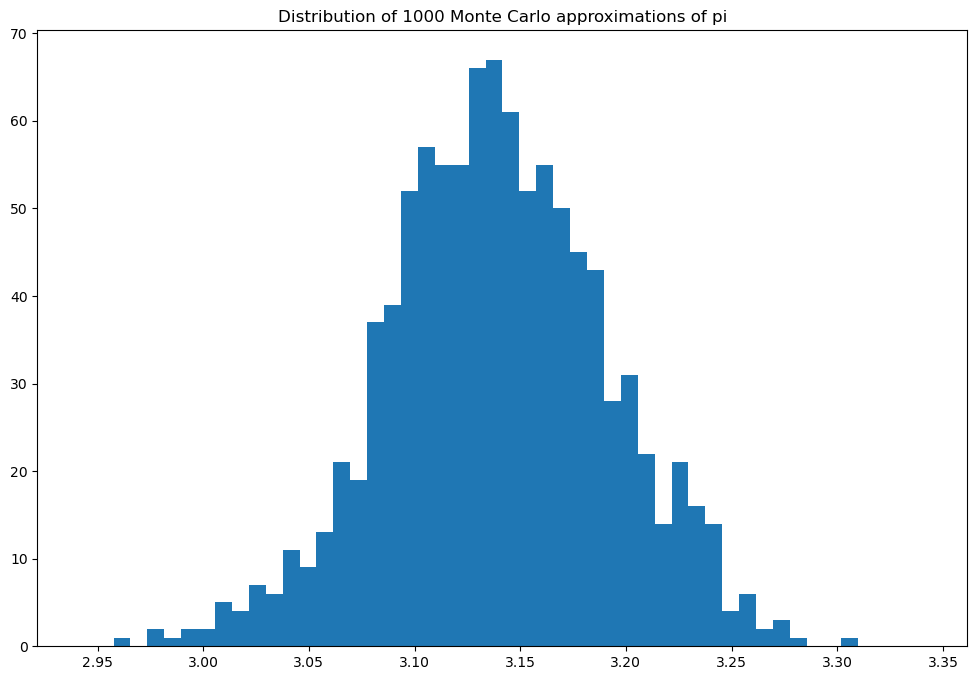

In [3]:
# distribution of Monte Carlo integral

N=1000; # number of Monte Carlo samples used to simulate the integral
S=1000; # number of runs to generate the distribution of estimates

qs = np.empty(S,dtype=float)
ses = np.empty(S,dtype=float)

for i in range(S):
    q,se = mc_int_cube(g,ndims=2,N=N)
    qs[i] = 4*q
    ses[i] = 4*se

plt.hist(qs,bins=50,range=(np.pi-.2, np.pi+.2))
plt.title('Distribution of %d Monte Carlo approximations of pi'%S)

print('True value (pi)                  :', np.round(np.pi,10))
print('Average estimate across all runs :', qs.mean().round(10))
print('Mean bias                        :', np.mean(qs-np.pi).round(10))
print('Average std err across all runs  :', ses.mean().round(10))
print('Std dev of bias                  :', np.std(qs-np.pi).round(10))

#### Further learning resources

- SciPy docs [https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)  
- [https://en.wikipedia.org/wiki/Gaussian_quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature)  
- Monte Carlo integration [https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration)  
- Useful library for Monte Carlo methods [https://chaospy.readthedocs.io/en/master/index.html](https://chaospy.readthedocs.io/en/master/index.html)  